# Árvores de Decisão - Parte 1

## Árvore de Decisão 

- Sequência de perguntas if-else sobre features individuais.
- Objetivo: inferir rótulos.
- Capaz de capturar relacionamentos não lineares entre recursos e rótulos.
- Não requer escalonamento de features (ex: normalização, padronização, ..)

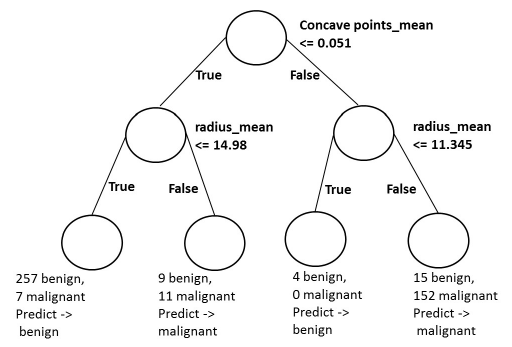

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [42]:
import sklearn
sklearn.__version__

'0.21.2'

In [6]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8947368421052632

In [13]:
X.shape

(569, 30)

In [9]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05079513, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.81382328, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13538159, 0.        , 0.        ])

### E se usarmos somente as features com importância maior que zero? Como fica o resultado?

In [15]:
import pandas as pd
df = pd.DataFrame(dt.feature_importances_)
df[ df[0] > 0 ]

,0
11,0.050795
20,0.813823
27,0.135382


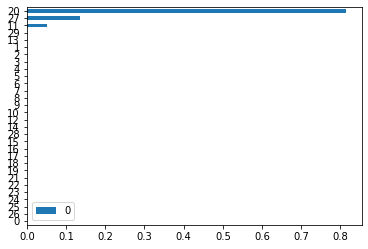

In [26]:
df.sort_values(by=0).plot(kind='barh')

In [20]:
idx = df[ df[0] > 0 ].index
idx.values

array([11, 20, 27])

In [21]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train[:, idx],y_train)
y_pred = dt.predict(X_test[:, idx])
accuracy_score(y_test, y_pred)

0.8947368421052632

In [47]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

[Text(167.4, 181.2, 'X[1] <= 16.795\nentropy = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(83.7, 108.72, 'X[2] <= 0.136\nentropy = 0.162\nsamples = 304\nvalue = [27, 277]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.036\nsamples = 271\nvalue = [5, 266]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.444\nsamples = 33\nvalue = [22, 11]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.473\nentropy = 0.1\nsamples = 151\nvalue = [143, 8]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.04\nsamples = 146\nvalue = [143, 3]')]

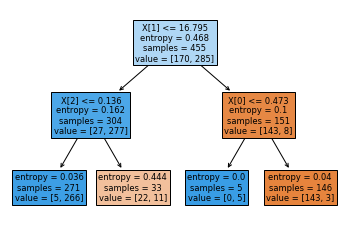

In [29]:
tree.plot_tree(dt, filled=True)

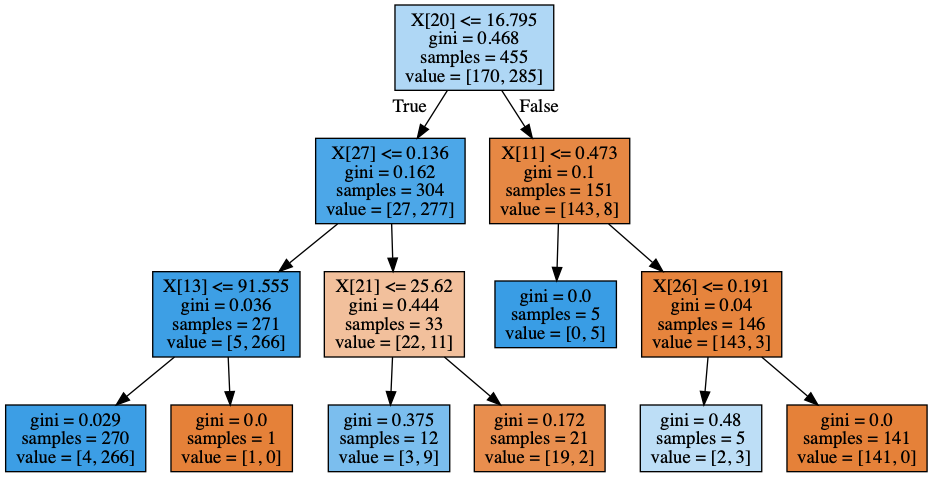

In [46]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [35]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

In [36]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04767319, 0.        , 0.00994013, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.76380448, 0.03365234, 0.        , 0.        , 0.        ,
       0.        , 0.01786902, 0.12706084, 0.        , 0.        ])

## Regiões de decisão

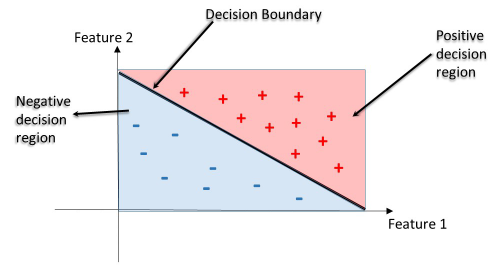

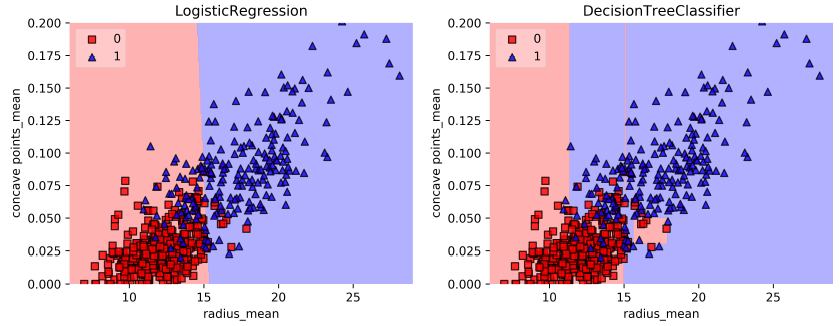

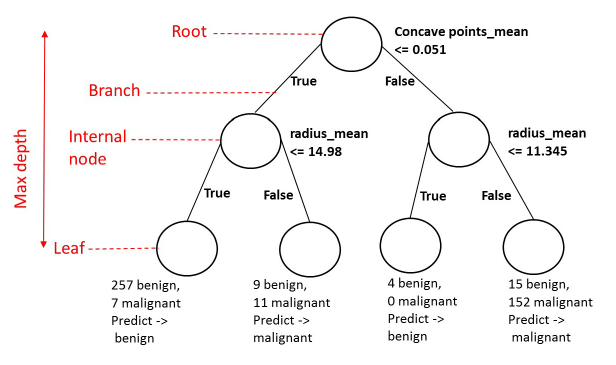

## Information Gain

Information Gain (IG) is the difference between the impurity of the parent node and the sum of the child node impurities.

The lower the impurity of the child nodes, the larger the information gain.

- f	- feature
- sp - split-point

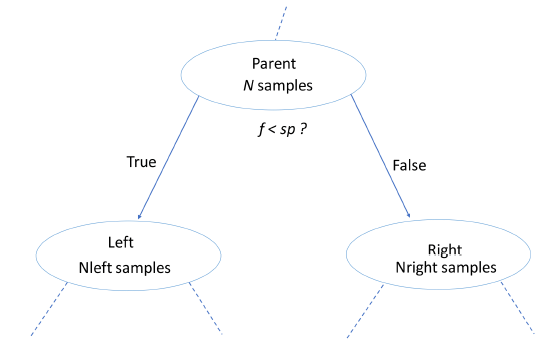

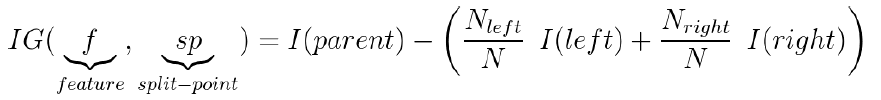

## Critérios para medir a impureza de um nó I:

- Gini index / impurity ($I_G$)
- Entropy ($I_H$)
- Classification Error ($I_E$)

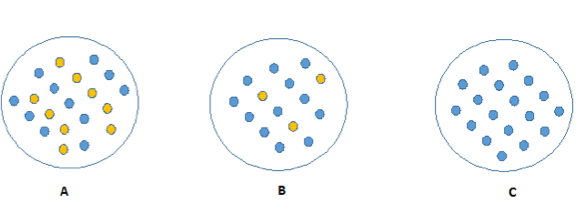

### Gini

- Criterion to minimize the probability of misclassification:

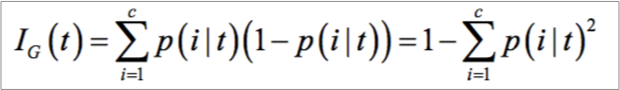

- Measure of variance across all classes of the data. 
- In practice both Gini impurity and entropy typically yield very similar results.
    - So it is often not worth spending much time on evaluating trees using different impurity criteria

### Entropy

- Entropy attempts to maximize the mutual information in the tree.
- Measure of randomness. More the random data, higher the entropy.

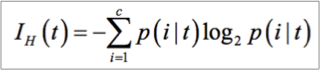

- p (i | t ) is the proportion of the samples that belong to class c for a particular node t. 
  - Zero - if all samples at a node belong to the same class. 
    - Binary class example:
      - p (i = 1 | t ) = 1 or p (i = 0 | t ) = 0
  - Maximal (1) - if we have a uniform class distribution.
    - Binary class example:
      - p (i = 1 | t ) = 0.5 and p (i = 0 | t ) = 0.5


### Classification Error
- Useful criterion for pruning, but not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes.

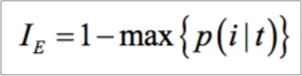

### Funcionamento
- Nodes are grown recursively.
- At each node, split the data based on: 
  - feature f and split-point sp to maximize IG(node).
- If IG(node)= 0, declare the node a leaf.

### Exemplo GINI

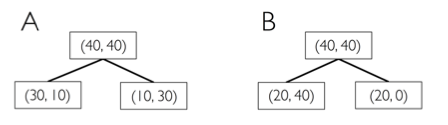



### Entendendo as medidas de impureza

In [52]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [18]:
#X= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
#y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [19]:
X= np.array([[2,3], [-4,0], [1,1], [1,1], [-2,2], [2,7]])
y = np.array([4, 3, 3, 4, 3, 4])

In [20]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

In [21]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [22]:
predicted= model.predict([[1,2],[3,4]])
print(predicted)

[3 4]


In [23]:
model.feature_importances_

array([0.75, 0.25])

In [24]:
df = pd.DataFrame(X)
df['label'] = y
df

,0,1,label
0,2,3,4
1,-4,0,3
2,1,1,3
3,1,1,4
4,-2,2,3
5,2,7,4


In [25]:
np.unique(y, return_counts=True)

(array([3, 4]), array([3, 3]))

### Cáculo do Gini

In [26]:
1 - ( (3/6)**2 + (3/6)**2 )

0.5

In [49]:
def gini(group):
    values, counts = np.unique(group, return_counts=True)
    print('counts: {}'.format(counts))
    tot = np.sum(counts)
    sum_sq = 0
    for i in counts:
        sum_sq += (i/tot)**2
    return 1 - sum_sq

In [28]:
y

array([4, 3, 3, 4, 3, 4])

In [29]:
gini(y)

counts: [3 3]


0.5

In [30]:
df_ = df.sort_values(by=[0,1])
df_

,0,1,label
1,-4,0,3
4,-2,2,3
2,1,1,3
3,1,1,4
0,2,3,4
5,2,7,4


In [56]:
gini([3]), gini([3,3]), gini([3,3,3,4]), gini([3,3,3,4]), gini([3,3,3,4,4,4]) 

counts: [1]
counts: [2]
counts: [3 1]
counts: [3 1]
counts: [3 3]


(0.0, 0.0, 0.375, 0.375, 0.5)

In [31]:
for i, v in enumerate(df_['label']):
    if i == 0:
        continue
    left = df_['label'][:i]
    gini_left = gini(left)
    right = df_['label'][i:]
    gini_right = gini(right)
    print('left:{}, right:{}'.format(gini_left, gini_right))

counts: [1]
counts: [2 3]
left:0.0, right:0.48
counts: [2]
counts: [1 3]
left:0.0, right:0.375
counts: [3]
counts: [3]
left:0.0, right:0.0
counts: [3 1]
counts: [2]
left:0.375, right:0.0
counts: [3 2]
counts: [1]
left:0.48, right:0.0


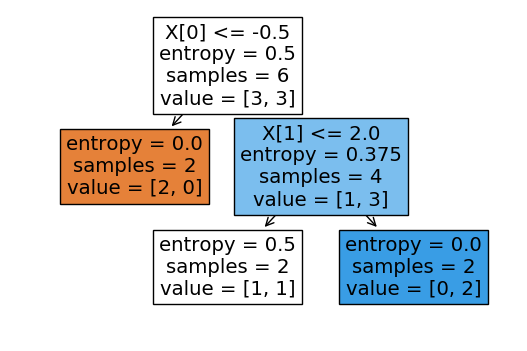

In [32]:
plt.figure(dpi=100)
tree.plot_tree(model, filled=True);

In [33]:
model.feature_importances_

array([0.75, 0.25])